In [16]:
# external pacakges that we need 
from time import time
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

# my own package
from continuous_model.simulator import *
from continuous_model.plot_model import plot_field

In [18]:
# Define several parameters
Ms = 3.84e5
A = 8.78e-12  # A/m
D = 1.58e-3
B = 0.1
mu0 = 4 * np.pi * 1e-7

In [22]:
# initial_state = np.load('./normalised_m/is_skyrmion_cuboid.npy')
initial_state = np.load('./normalised_m/m_uber_8.npy')

nx = initial_state.shape[0]
ny = initial_state.shape[1]
nz = initial_state.shape[2]


my_cool_mesh = RectangularMesh(nx=nx, ny=ny, nz=nz, units=5e-9)
my_cool_m = m_Field(my_cool_mesh, Ms, initial_state)

If you want to take a look at the initial state of is_skyrmion_cuboid

In [23]:
initial_E = Exchange(A=A).energy(my_cool_m) + DMI(D=D).energy(my_cool_m) + Zeeman(H=[0, 0, B/mu0]).energy(my_cool_m)
print(initial_E)

1.290600493450234e-19


In [24]:
# initialise a simulator
# my_cool_simulator = Simulator(A, 0, 0, 0, 0, 0)
my_cool_simulator = Simulator(A, D, [0, 0, B/mu0], 0, 0, 20)

start = time()
final_state, E_final = my_cool_simulator.compute_minimum(my_cool_m, 0.001,  800000, 40000, './iterations_100/')
print("Execution time of MonteCarlo simulation for skyrmion_cuboid: {}".format(time()-start))
print("The E_final: \n", E_final)
print(final_state)

K, u are ignored
Execution time of MonteCarlo simulation for skyrmion_cuboid: 157.69084095954895
The E_final: 
 -2.384313785303807e-20
[[[[ 0.53668689 -0.03168213  0.84318647]]

  [[ 0.85317484  0.03878364  0.52018124]]

  [[ 0.98334914  0.07303436  0.16640447]]]]


In [ ]:
print("The final state: \n", final_state)

## **************************************

In [5]:
# Test 1
region = df.Region(p1=(-75e-9, -75e-9, 0), p2=(75e-9, 75e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

initial_state = np.load('./normalised_m/is_skyrmion_cuboid.npy')
m = df.Field(mesh, dim=3, value=initial_state , norm=Ms)

system = mm.System(name='uber_relax_skyrmion')
B = 0.1

system.m = m

system.energy = (mm.Exchange(A=A) + 
                 mm.DMI(D=D, crystalclass='T') +
                 mm.Zeeman(H=(0, 0, B/mu0))
                )
E = oc.compute(system.energy.energy, system)
print(E)

Running OOMMF (ExeOOMMFRunner)[2022/09/03 04:19]... (3.0 s)
3.52345252016e-18


## Relax the magnetic system

In [6]:
md = oc.MinDriver()
md.drive(system)
E_minimum = oc.compute(system.energy.energy, system)
print(E_minimum)

Running OOMMF (ExeOOMMFRunner)[2022/09/03 04:19]... (2.0 s)
Running OOMMF (ExeOOMMFRunner)[2022/09/03 04:19]... (1.7 s)
-2.10671824364e-17


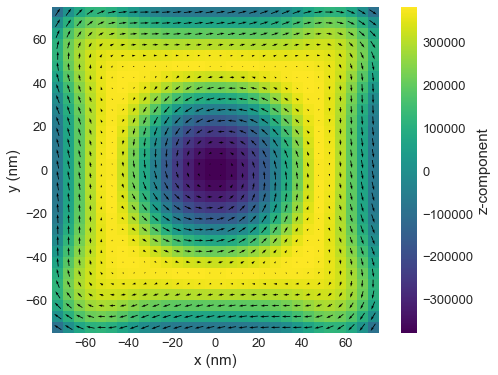

In [7]:
m.plane(z=10e-9).mpl() # no demag cuboid

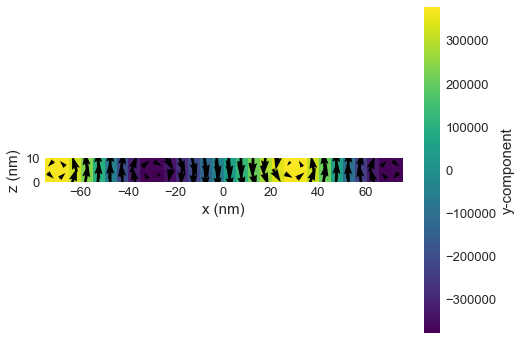

In [15]:
# from turtle import color


m.plane(y=0).mpl() # no demag cuboid